<a href="https://colab.research.google.com/github/yutsutke/practice/blob/main/botterdaypermonth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   毎月の何日に購入すればよいのか?
*   
*   結論としては、
*ビットコインは、21日の終値で購入し22日の終値で売却するマイナスになりやすい。
*日経平均では特定日の傾向はみられず。





In [4]:
!pip install yfinance
!pip install matplotlib
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.5 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

[*********************100%***********************]  1 of 1 completed


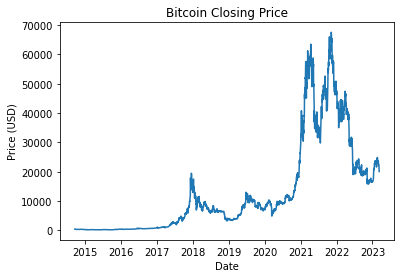

In [5]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import yfinance as yf

bitcoin = yf.download("BTC-USD", period="max")

# 終値の折れ線グラフを描画する
plt.plot(bitcoin["Close"])

# グラフのタイトルやラベルを設定する
plt.title("Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

# グラフを表示する
plt.show()


*   簡単なバックテストをしたい
*   資金１万ドルスタート。
*   毎月２０日に購入
*   毎月２７日に売却




[*********************100%***********************]  1 of 1 completed
                   price  shares          cash         total
Date                                                        
2023-03-04  22353.349609     0.0  20199.434753  20199.434753
2023-03-05  22435.513672     0.0  20199.434753  20199.434753
2023-03-06  22429.757812     0.0  20199.434753  20199.434753
2023-03-07  22219.769531     0.0  20199.434753  20199.434753
2023-03-08  21718.080078     0.0  20199.434753  20199.434753


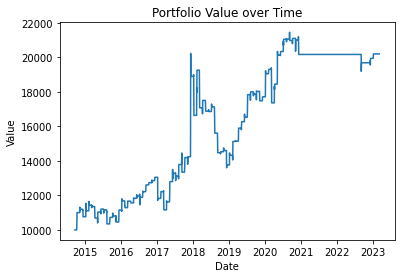

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


# データの取得
bitcoin = yf.download("BTC-USD", period="max")

# 資金の初期値
initial_capital = 10000

# 取引の開始日
start_date = "2010-01-01"

# 取引の終了日
end_date = "2023-03-09"

# 毎月の購入日と売却日
buy_date =  5
sell_date = 8

# 取引履歴を保持するデータフレームを作成
trades = pd.DataFrame(index=bitcoin.loc[start_date:end_date].index)
trades["price"] = bitcoin.loc[start_date:end_date, "Adj Close"]
trades["shares"] = 0
trades["cash"] = initial_capital
trades["total"] = trades["cash"]


# 取引のシミュレーション
for i in range(len(trades)):
    date = trades.index[i]
    if date.day == buy_date:
        # 購入
        shares = trades.loc[date, "cash"] // trades.loc[date, "price"]
        trades.loc[date:, "shares"] += shares
        trades.loc[date:, "cash"] -= shares * trades.loc[date, "price"]
    elif date.day == sell_date:
        # 売却
        trades.loc[date:, "cash"] += trades.loc[date, "shares"] * trades.loc[date, "price"]
        trades.loc[date:, "shares"] = 0
    # 総資産の計算
    trades.loc[date, "total"] = trades.loc[date, "cash"] + trades.loc[date, "shares"] * trades.loc[date, "price"]

# 結果の表示
print(trades.tail())

# グラフの描画
plt.plot(trades.index, trades["total"])
plt.title("Portfolio Value over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


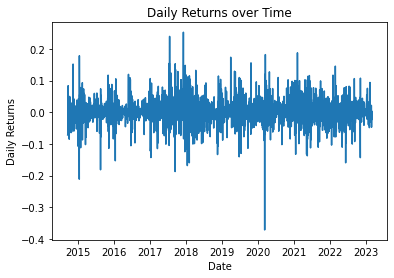

In [7]:
# start_date から end_date までの期間のデータを取得する
data = bitcoin.loc[start_date:end_date]

# 日ごとの変化率を計算する
daily_returns = data["Adj Close"].pct_change()

# 日ごとの変化率をプロットする
plt.plot(daily_returns)
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.title("Daily Returns over Time")
plt.show()


毎月の何日の終値に購入するのがベスト？

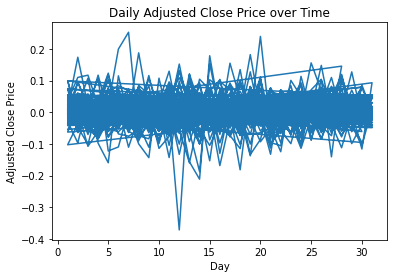

In [8]:
# start_date から end_date までの期間のデータを取得する
data = bitcoin.loc[start_date:end_date]

# 日次データに変換する
daily_data = data.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日付を横軸にプロットする
plt.plot(daily_data.index.day,daily_returns)
plt.xlabel("Day")
plt.ylabel("Adjusted Close Price")
plt.title("Daily Adjusted Close Price over Time")
plt.show()




*   日毎の平均を計算するをとって、わかりやすくすると
*   仮想通貨は１1日と22日は　特に22日は下落しやすい？


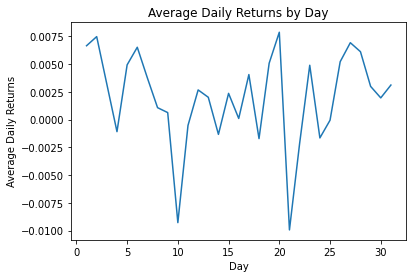

In [9]:
# start_date から end_date までの期間のデータを取得する
data = bitcoin.loc[start_date:end_date]

# 日次データに変換する
daily_data = data.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日毎の平均を計算する
daily_mean = daily_returns.groupby(daily_returns.index.day).mean()

# 日付を横軸に、日ごとの平均変化率を縦軸にプロットする
plt.plot(daily_mean.index, daily_mean)
plt.xlabel("Day")
plt.ylabel("Average Daily Returns")
plt.title("Average Daily Returns by Day")
plt.show()




*   ２０２２年、２０２３年でも同じ傾向はあるか？
*   2022年には傾向はあるが、２０２３年には傾向がなくなる



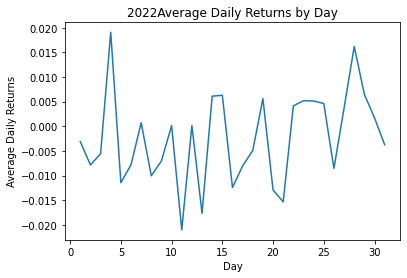

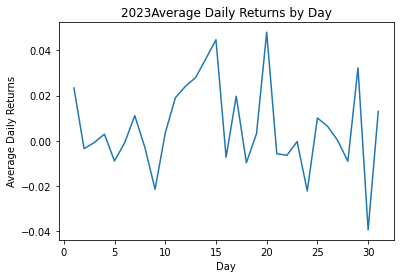

In [12]:
start_date = '2022-01-01'
end_date = '2022-12-31'

# start_date から end_date までの期間のデータを取得する
data = bitcoin.loc[start_date:end_date]

# 日次データに変換する
daily_data = data.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日毎の平均を計算する
daily_mean = daily_returns.groupby(daily_returns.index.day).mean()

# 日付を横軸に、日ごとの平均変化率を縦軸にプロットする
plt.plot(daily_mean.index, daily_mean)
plt.xlabel("Day")
plt.ylabel("Average Daily Returns")
plt.title("2022Average Daily Returns by Day")
plt.show()



start_date = '2023-01-01'
end_date = '2023-3-1'

# start_date から end_date までの期間のデータを取得する
data = bitcoin.loc[start_date:end_date]

# 日次データに変換する
daily_data = data.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日毎の平均を計算する
daily_mean = daily_returns.groupby(daily_returns.index.day).mean()

# 日付を横軸に、日ごとの平均変化率を縦軸にプロットする
plt.plot(daily_mean.index, daily_mean)
plt.xlabel("Day")
plt.ylabel("Average Daily Returns")
plt.title("2023Average Daily Returns by Day")
plt.show()


In [3]:
start_date = '2022-01-01'
end_date = '2023-3-1'

# start_date から end_date までの期間のデータを取得する
data = bitcoin.loc[start_date:end_date]

# 日次データに変換する
daily_data = data.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日毎の平均を計算する
daily_mean = daily_returns.groupby(daily_returns.index.day).mean()

# 日付を横軸に、日ごとの平均変化率を縦軸にプロットする
plt.plot(daily_mean.index, daily_mean)
plt.xlabel("Day")
plt.ylabel("Average Daily Returns")
plt.title("Average Daily Returns by Day")
plt.show()


NameError: ignored

*   日経平均で計算すると
*   月末が上昇する可能性が高い



[*********************100%***********************]  1 of 1 completed
Date
1     0.000896
2     0.000725
3    -0.000069
4     0.000279
5    -0.000127
6     0.000086
7    -0.000043
8    -0.000302
9    -0.000627
10   -0.000141
11   -0.000204
12    0.000106
13   -0.000350
14    0.000694
15    0.000744
16   -0.000377
17    0.000267
18    0.000050
19    0.000184
20   -0.000352
21    0.000518
22   -0.000223
23   -0.000379
24   -0.000120
25    0.000820
26    0.000710
27    0.000951
28    0.000735
29    0.001142
30    0.000251
31    0.000655
Name: Adj Close, dtype: float64


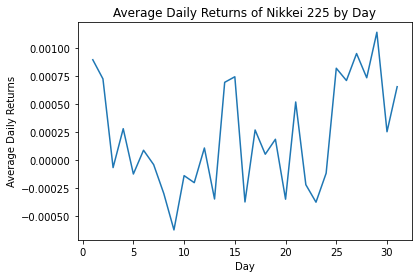

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

nikkei = yf.download("^N225", period="max")


# 日次データに変換する
daily_data = nikkei.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日毎の平均を計算する
daily_mean = daily_returns.groupby(daily_returns.index.day).mean()

print(daily_mean)

# 日付を横軸に、日ごとの平均変化率を縦軸にプロットする
plt.plot(daily_mean.index, daily_mean)
plt.xlabel("Day")
plt.ylabel("Average Daily Returns")
plt.title("Average Daily Returns of Nikkei 225 by Day")
plt.show()




*   ２０２２年、２０２３年で見てみると
*   19日の終値で購入して、２０日の終値で売却するとマイナスという傾向がみられるが、平均変動幅が１パーセントもない。



[*********************100%***********************]  1 of 1 completed


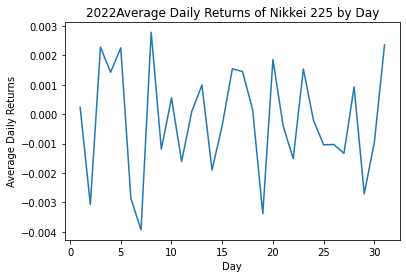

[*********************100%***********************]  1 of 1 completed


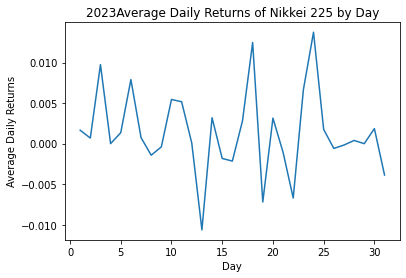

Date
1     0.001655
2     0.000688
3     0.009753
4     0.000000
5     0.001347
6     0.007911
7     0.000744
8    -0.001427
9    -0.000400
10    0.005453
11    0.005166
12    0.000072
13   -0.010647
14    0.003198
15   -0.001828
16   -0.002152
17    0.002816
18    0.012480
19   -0.007202
20    0.003150
21   -0.001069
22   -0.006712
23    0.006638
24    0.013747
25    0.001755
26   -0.000589
27   -0.000176
28    0.000394
29    0.000000
30    0.001857
31   -0.003875
Name: Adj Close, dtype: float64


In [17]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

nikkei = yf.download("^N225", start="2022-01-01", end="2022-12-31")

# 日次データに変換する
daily_data = nikkei.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日毎の平均を計算する
daily_mean = daily_returns.groupby(daily_returns.index.day).mean()


# 日付を横軸に、日ごとの平均変化率を縦軸にプロットする
plt.plot(daily_mean.index, daily_mean)
plt.xlabel("Day")
plt.ylabel("Average Daily Returns")
plt.title("2022Average Daily Returns of Nikkei 225 by Day")
plt.show()


nikkei = yf.download("^N225", start="2023-01-01", end="2023-03-08")

# 日次データに変換する
daily_data = nikkei.resample('D').last()

# 日ごとの変化率を計算する
daily_returns = daily_data["Adj Close"].pct_change()

# 日毎の平均を計算する
daily_mean = daily_returns.groupby(daily_returns.index.day).mean()

# 日付を横軸に、日ごとの平均変化率を縦軸にプロットする
plt.plot(daily_mean.index, daily_mean)
plt.xlabel("Day")
plt.ylabel("Average Daily Returns")
plt.title("2023Average Daily Returns of Nikkei 225 by Day")
plt.show()

print(daily_mean)
